# Week # 5

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, shapiro
from matplotlib import pyplot as plt
 

In [24]:
data = pd.read_csv("51-data.csv")
data.head()
data.describe()



# Replace negatives with NaN
# nale => male
# zip codes for turku and tampere => replace zip codes with concrete city names
# 


sex     location  purchases  retention_time
female  20100     9.0        95.0              1
male    Helsinki  9.0        1.2               1
                  7.0        16.7              1
                             28.1              1
                             32.9              1
                                              ..
female  Turku     3.0        47.6              1
                             140.1             1
                  4.0        16.6              1
                             56.0              1
nale    Turku     0.0        106.1             1
Length: 169, dtype: int64

In [4]:
data.purchases.fillna(0, inplace=True)

In [5]:
data.retention_time.fillna(data.retention_time.median(),inplace=True)

In [25]:
data.head()

,sex,location,purchases,retention_time
0,female,Helsinki,7.0,57.1
1,female,Helsinki,5.0,NaN
2,female,Turku,8.0,50.6
3,male,Helsinki,5.0,31.7
4,female,Helsinki,2.0,120.0


In [28]:
## Bonus stuff

fn = lambda s: s.fillna(s.median())
data.retention_time = data.groupby(["sex","location"]).retention_time.transform(fn)

data.head()

,sex,location,purchases,retention_time
0,female,Helsinki,7.0,57.1
1,female,Helsinki,5.0,57.1
2,female,Turku,8.0,50.6
3,male,Helsinki,5.0,31.7
4,female,Helsinki,2.0,120.0


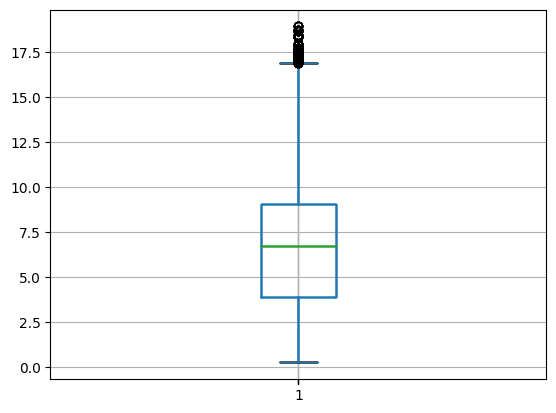

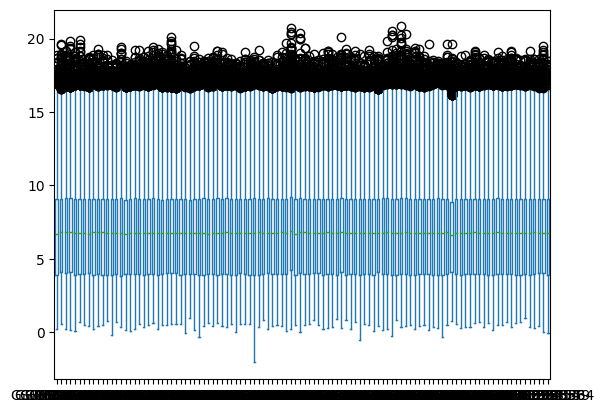

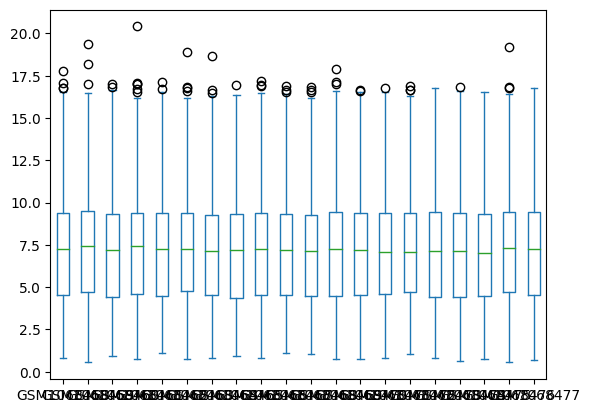

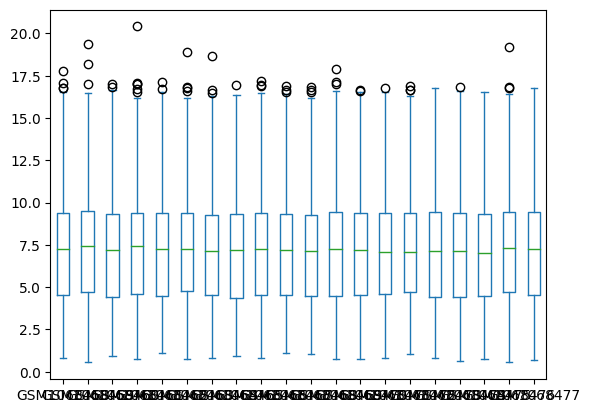

In [40]:
gene_data = pd.read_csv("GDS5037.soft",skiprows=range(160), delim_whitespace=True,index_col=0)
gene_data.drop(gene_data.tail(109).index, inplace = True)

asthma = pd.read_csv("52-asthma.ids.txt", header=None)[0]
control = pd.read_csv("52-control.ids.txt", header=None)[0]
probes = pd.read_csv("52-probes.ids.txt", header=None)[0]

# list(range(160) + [234234])

filtered = gene_data.loc[probes, pd.concat([control, asthma])]
filtered.loc[probes, control].plot.box()
plt.show()


# filtered.head()




In [ ]:
cyclist_data = pd.read_csv("53-data.csv")

In [ ]:
cyclist_data.head()


,Eteläesplanadi,Kaivokatu,Kuusisaarentie,Merikannontie,Länsituulenkuja,year,month,day,weekday
0,999,1608,699,1287,646,2017,11,10,4
1,328,377,110,266,267,2017,11,11,5
2,316,474,252,564,228,2017,11,12,6
3,1149,1753,888,1537,730,2017,11,13,0
4,1246,1825,812,1505,787,2017,11,14,1


<AxesSubplot:xlabel='weekday'>

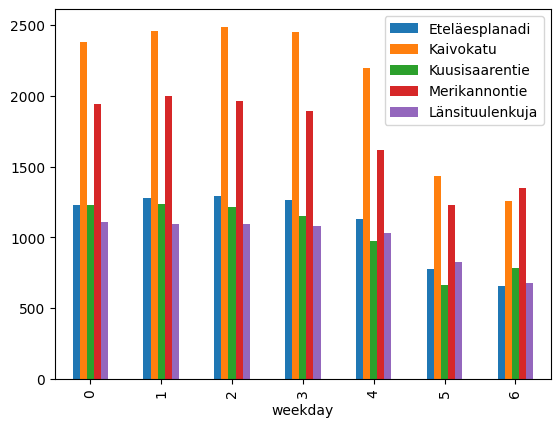

In [ ]:
cyclist_data_weekday = cyclist_data.drop(["year","day","month",],axis=1)

daily_cyclist = cyclist_data_weekday.groupby("weekday").mean()
daily_cyclist.plot.bar()

<AxesSubplot:xlabel='month'>

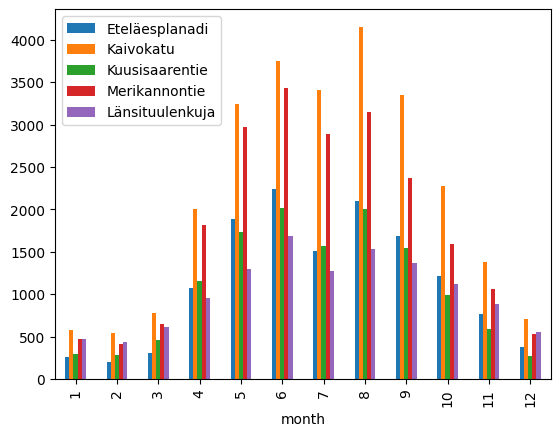

In [ ]:
cyclist_data_month = cyclist_data.drop(["year","day","weekday",],axis=1)
monthly_cyclist = cyclist_data_month.groupby("month").mean()
monthly_cyclist.plot.bar()

                 Eteläesplanadi  Kaivokatu  Kuusisaarentie  Merikannontie  \
Eteläesplanadi         1.000000   0.892638        0.892009       0.896663   
Kaivokatu              0.892638   1.000000        0.950914       0.962023   
Kuusisaarentie         0.892009   0.950914        1.000000       0.979178   
Merikannontie          0.896663   0.962023        0.979178       1.000000   
Länsituulenkuja        0.664733   0.635698        0.597560       0.599511   

                 Länsituulenkuja  
Eteläesplanadi          0.664733  
Kaivokatu               0.635698  
Kuusisaarentie          0.597560  
Merikannontie           0.599511  
Länsituulenkuja         1.000000  


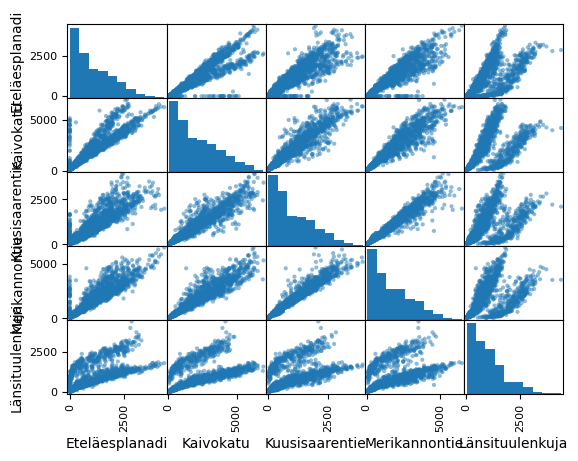

In [ ]:
d = cyclist_data.drop(["year","month","day","weekday"],axis=1)
print(d.corr(method="spearman"))
x =pd.plotting.scatter_matrix(d)

In [41]:
image_group = pd.read_csv("54-image.csv")
video_group = pd.read_csv("54-video.csv")



# User pairing makes this related data
# outer outer and inner


# taking the difference makes it normal 
# Given the the pvalue  there is no significance 


# lot of learning data
# if you add data you make a new observation even if it is a zero then it scews the data 


print(image_group.describe())
print(video_group.describe())

          person_id  amount_spent
count    195.000000    195.000000
mean   48733.717949     50.470308
std    27861.594086     47.396634
min       45.000000      0.920000
25%    24879.000000     17.990000
50%    48618.000000     36.570000
75%    72663.000000     71.580000
max    99830.000000    329.230000
          person_id  amount_spent
count    175.000000    175.000000
mean   48752.657143     43.620114
std    28216.963650     42.171440
min       45.000000      0.180000
25%    23334.000000     14.315000
50%    47937.000000     31.990000
75%    72663.000000     59.720000
max    99830.000000    214.340000


In [ ]:
print(shapiro(image_group.amount_spent)[1]>= 0.05)
print(shapiro(video_group.amount_spent)[1]>= 0.05)

False
False


In [ ]:
mannwhitneyu(image_group.amount_spent,video_group.amount_spent)

MannwhitneyuResult(statistic=18727.0, pvalue=0.10522752647898526)

In [ ]:
print(image_group.amount_spent.mean())
print(video_group.amount_spent.mean())

50.470307692307685
43.62011428571429
